<a href="https://colab.research.google.com/github/giteshwarisoni/sales-prediction/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


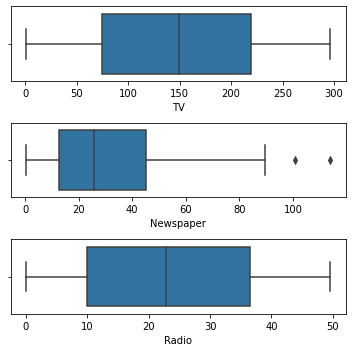

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


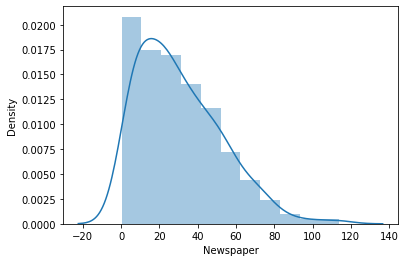

In [ ]:
sns.distplot(df['Newspaper'])


In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


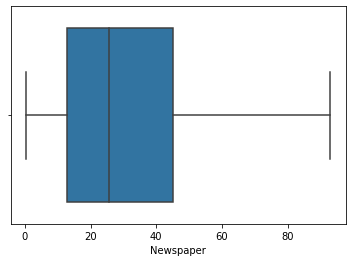

In [ ]:
sns.boxplot(data['Newspaper'])


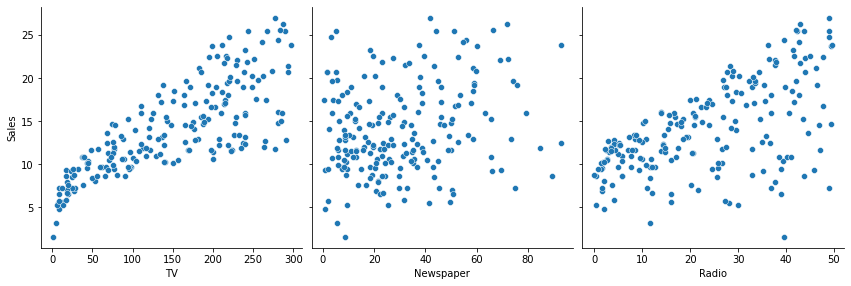

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()
     


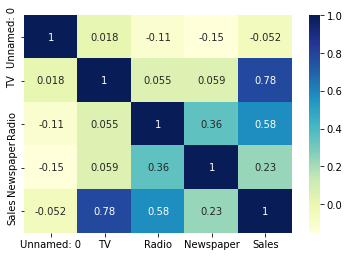

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()


In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)


In [ ]:
print(important_features)


['TV', 'Radio', 'Sales']


In [ ]:
X = data['TV']
y = data['Sales']
     

In [ ]:
X = X.values.reshape(-1,1)


In [ ]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(X.shape,y.shape)


(200, 1) (200,)


In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)


In [ ]:
print(X_train.shape,y_train.shape)


(134, 1) (134,)


In [ ]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)
print(knn_train_pred, knn_test_pred)

[ 8.2  17.62  8.64  5.58 18.92 19.82 14.28 19.82 14.56 15.46 13.18 18.22
 18.9  12.7   8.18 12.9  12.34 11.74  7.52 15.78 13.38 13.66 19.84 17.72
 12.18 15.42 11.18 16.   18.3  19.88 15.28 17.16 15.24 15.06 15.06 11.32
 10.94 15.06 13.72 11.04 17.5   7.38 15.06 13.84 13.74 10.28 19.02 19.76
  9.9  15.78 19.02 14.02  4.84 14.48 19.7  10.72  6.2  12.84  7.52 19.7
  7.38 15.74 18.14 12.7  15.06 10.36 17.3  13.08 18.14 18.5  10.52 10.52
 11.32 18.82  9.1  13.3   9.9  17.02 12.9   7.52 18.92 13.92 16.78 13.72
 18.3   5.58 19.16 13.08 19.4  14.34 12.    8.64 18.82 13.36 20.22 18.5
 16.32 11.74  8.2  10.94 11.68 20.7  13.36 17.16 12.84 16.2  17.16  7.38
 16.26  8.64 10.52 17.72 16.56 13.72 13.88 19.16 11.18 19.7   8.64  5.58
 16.2  14.34 12.   19.4  14.56 18.12 17.76 14.92 13.36 19.66 15.78 13.08
 13.88  5.58] [11.74 10.52 20.7  11.18 20.7   5.58 16.56 16.   15.06 12.18 14.52 17.5
 15.06 10.64 11.32 10.28 10.04 13.88 10.72 11.18 22.36 18.22 10.04 11.02
 19.02 19.84 13.72 16.   11.18 13.74  6.

In [ ]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])


In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6337451744429266
RMSE: 3.2138346773493707


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.639968,0.633745,3.213835,0.006223


In [ ]:

svr = SVR().fit(X_train,y_train)
svr


SVR()

In [ ]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)
     

In [ ]:
print(svr_train_pred,svr_test_pred)

[ 8.31454864 17.21900099  8.16789538  7.66148413 17.21261208 17.20351942
 17.32433204 17.10855042 15.0417202  15.36008689 12.68880259 16.69570046
 17.12599918 11.3119492   8.2375402  13.38766111 13.27359873 10.96096681
  7.93580037 17.64405496 12.38040143 13.17119188 17.28144269 17.6607359
 11.20282101 15.46021174 10.78013872 16.36971188 17.15334721 17.09450232
 14.76929715 16.26068544 15.14788022 14.51734605 14.39343966 11.62518559
  9.10328989 14.45788888 12.03455816 11.86629035 17.27771126  7.88894767
 17.60971241 13.10027778 13.02255585  9.8132777  17.60554783 17.08025791
  9.92719861 17.64062371 17.58133908 14.58258987  7.59570875 17.56413502
 16.92034367  9.30936788  7.77694424 12.91869552  7.95869404 17.01367307
  7.91043368 16.61518277 16.03482672 11.36939711 17.60971241 10.27233597
 16.4994442  13.22632381 16.06096493 17.69439907 10.4316227  10.31381561
 11.53660272 17.65149698  8.70642868 12.15109529 10.07214299 16.14896502
 13.31708012  7.93903131 17.19646738 17.63469153 15.

In [ ]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6237053096734316
RMSE: 3.2575860754253245


In [ ]:
Results.head()
     

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.639968,0.633745,3.213835,0.006223
1,Support Vector Machine,0.553378,0.623705,3.257586,-0.070327


In [ ]:
import statsmodels.api as sm
     

In [ ]:
X_train_constant = sm.add_constant(X_train)


In [ ]:
model = sm.OLS(y_train, X_train_constant).fit()


In [ ]:
model.params


const    7.049665
x1       0.047154
dtype: float64

In [ ]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.93e-26
Time:                        10:02:57   Log-Likelihood:                -352.03
No. Observations:                 134   AIC:                             708.1
Df Residuals:                     132   BIC:                             713.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0497      0.603     11.690      0.0

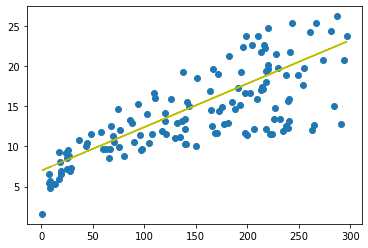

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res


91    -1.098265
142    2.652907
44     0.266773
56    -1.893888
128    7.262338
         ...   
137    0.844321
27    -2.471309
67    -0.218199
3      4.306524
8     -2.655188
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([ 8.39826537, 17.44709272,  8.23322683,  7.39388797, 17.43766195,
       20.45550953, 17.61213126, 20.61111729, 15.3063071 , 15.57508415,
       12.976906  , 16.80108473, 17.31506189, 11.21335132,  8.31338841,
       13.78795253, 13.66535248, 10.83140498,  7.93144207, 18.37130854,
       12.57609811, 13.55218319, 20.31876331, 18.44675473, 11.09075126,
       15.65996111, 10.6475049 , 16.47100765, 17.35278499, 17.27262341,
       15.07525314, 16.36726914, 15.39589945, 14.85834535, 14.74989145,
       11.58586688,  9.14801188, 14.80647609, 12.1139902 , 11.89236702,
       17.53668507,  7.86071127, 18.2439931 , 13.47202161, 13.38242926,
        9.76101217, 19.55487064, 17.25376186,  9.86003529, 18.35716238,
       19.63503222, 14.91492999,  7.08267244, 18.10724688, 20.8940405 ,
        9.32719658,  7.66738041, 13.25982921,  7.96444978, 20.75729429,
        7.89371898, 16.71620776, 16.15979211, 11.27936673, 18.2439931 ,
       10.16653544, 16.59832309, 13.61348322, 16.18336905, 19.09

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


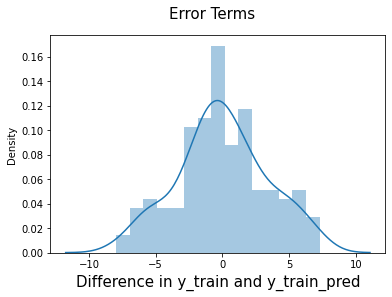

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

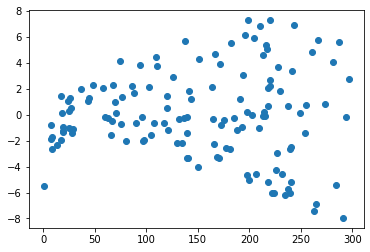

In [ ]:
plt.scatter(X_train, res)
plt.show()

In [ ]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
     

In [ ]:
y_pred

array([10.73709725, 10.30328166, 18.76268565, 10.65222028, 18.88057032,
        7.45990339, 17.8148929 , 16.43799994, 18.28171619, 11.16148206,
       14.43396053, 17.53668507, 14.75932222,  9.5723967 , 11.49155914,
        9.69971214,  8.85094251, 13.99542955,  9.40735816, 10.59092025,
       20.09714013, 16.80580011,  8.91224254, 11.78391312, 19.57373219,
       20.42250182, 12.22715949, 16.47100765, 10.65222028, 13.42486775,
        7.6720958 , 15.93345355, 15.76841501, 19.43698597,  9.07728108,
       12.51951347,  7.84656511, 20.5356711 , 16.67376928,  7.97388056,
       15.33459942,  7.601365  , 20.1065709 , 16.98498481, 13.23153689,
       14.10859884, 11.56228994, 10.27498934,  9.15744265,  7.30429562,
       12.85430594,  7.2429956 , 20.2857556 ,  8.84151174, 15.39589945,
       20.26217867, 20.71014042, 20.8610328 , 17.89976986, 15.90516123,
        8.53501159, 10.51075868, 12.37333648, 18.36187777, 10.60035103,
       11.31237444])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
     

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))


3.0194696594967843

In [ ]:
r2 = r2_score(y_test, y_pred)
r2


0.6767060104992937

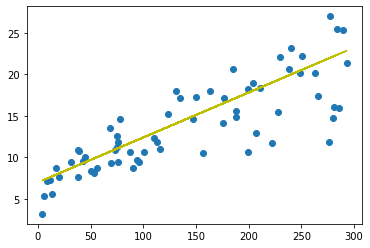

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()
     